#**Кластеризация данных. Контрольное задание**

# **1. Подготовка исходных данных**

Прочитать файл с исходными данными и записать его в таблицу.

In [2]:
import pandas as pd
df = pd.read_csv('10.csv', header = None)
df

,0,1,2
0,5.093243,3.747538,0.890167
1,5.238663,4.180865,2.235159
2,-6.014521,4.289452,7.492152
3,-9.513500,2.350497,7.159665
4,-8.578435,2.026593,6.010267
...,...,...,...
145,-6.633824,-9.137557,6.555827
146,-9.254805,1.024418,6.975690
147,6.235946,2.871467,1.456040
148,4.852697,1.770153,0.482544


In [3]:
df.columns = ['x1','x2', 'x3']
df

,x1,x2,x3
0,5.093243,3.747538,0.890167
1,5.238663,4.180865,2.235159
2,-6.014521,4.289452,7.492152
3,-9.513500,2.350497,7.159665
4,-8.578435,2.026593,6.010267
...,...,...,...
145,-6.633824,-9.137557,6.555827
146,-9.254805,1.024418,6.975690
147,6.235946,2.871467,1.456040
148,4.852697,1.770153,0.482544


Построить диаграмму рассеяния.

/usr/local/lib/python3.12/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


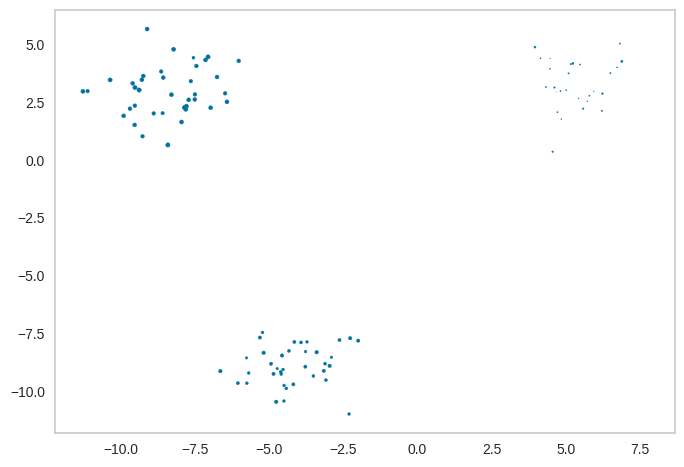

In [44]:
import matplotlib.pyplot as plt
plt.scatter(df['x1'], df['x2'], df['x3'])
plt.grid()

Произвести масштабирование значений признаков.

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit_transform(df)
df_m = pd.DataFrame(scaler, columns = df.columns)
df_m

,x1,x2,x3
0,0.861589,0.884781,0.580237
1,0.869250,0.910789,0.645286
2,0.276462,0.917306,0.899531
3,0.092144,0.800934,0.883451
4,0.141401,0.781494,0.827863
...,...,...,...
145,0.243838,0.111444,0.854248
146,0.105772,0.721345,0.874554
147,0.921784,0.832201,0.607605
148,0.848918,0.766103,0.560523


# **2. Кластеризация с использованием алгоритма k_средних**

Для выполнения заданий использовать библиотеки `sklearn` и `yellowbrick`.

Определить количество кластеров с использованием методов локтя и силуэта.


In [6]:
from sklearn.cluster import KMeans

wcss = []
for j in range(2, 10):
  kmeans = (KMeans(n_clusters = j,
                   init = 'k-means++',
                   n_init = 'auto',
                   max_iter = 200,
                   random_state = 42))
  kmeans.fit(df_m)
  wcss.append(kmeans.inertia_)
wcss

[30.320313319025743,
 12.140320963666118,
 1.315473379739259,
 1.1830205854752593,
 1.0889551097452694,
 1.0090109005775016,
 0.9279689611282629,
 0.8201781507678944]

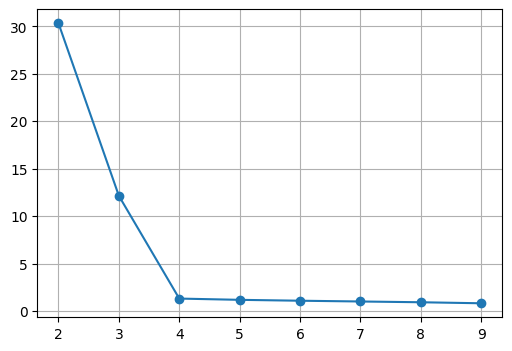

In [7]:
plt.figure(figsize = (6, 4))
plt.plot(range(2, 10), wcss, marker='o')
plt.grid()

In [8]:
for i in range(1, len(wcss) - 1):
  D = abs(wcss[i] - wcss[i + 1]) / abs(wcss[i - 1] - wcss[i])
  print('Критерий D для', i + 2, 'кластеров:', D)

Критерий D для 3 кластеров: 0.5954264101071306
Критерий D для 4 кластеров: 0.012235996233394601
Критерий D для 5 кластеров: 0.7101811347407463
Критерий D для 6 кластеров: 0.8498783272753918
Критерий D для 7 кластеров: 1.0137312044599418
Критерий D для 8 кластеров: 1.33006207764665


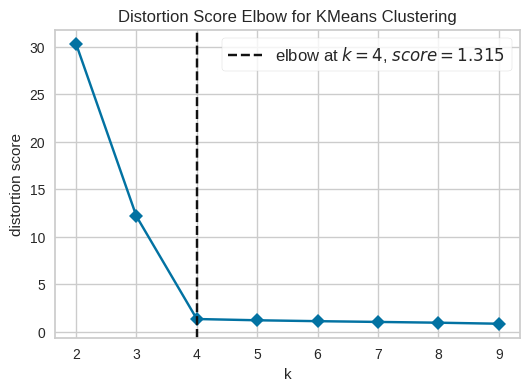

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = (KMeans(random_state = 42))

plt.figure(figsize = (6, 4))
visualizer = KElbowVisualizer(kmeans,
                              k = (2, 10),
                              timings = False)
visualizer.fit(df_m)
visualizer.show()

In [10]:
from sklearn.metrics import silhouette_score

for j in range(2, 10):
  kmeans = (KMeans(n_clusters = j,
                   init = 'k-means++',
                   n_init = 'auto',
                   max_iter = 300,
                   random_state = 42))
  kmeans.fit(df_m)
  cluster_labels = kmeans.labels_
  silhouette_avg = silhouette_score(df_m, cluster_labels)
  print(f'Количество кластеров = {j}, средний коэффициент силуэта: {silhouette_avg}')

Количество кластеров = 2, средний коэффициент силуэта: 0.4681880249587285
Количество кластеров = 3, средний коэффициент силуэта: 0.6465494387391414
Количество кластеров = 4, средний коэффициент силуэта: 0.838105818907135
Количество кластеров = 5, средний коэффициент силуэта: 0.698957612302987
Количество кластеров = 6, средний коэффициент силуэта: 0.5613355265959067
Количество кластеров = 7, средний коэффициент силуэта: 0.41064530510602887
Количество кластеров = 8, средний коэффициент силуэта: 0.4135391205441593
Количество кластеров = 9, средний коэффициент силуэта: 0.2742796195617322


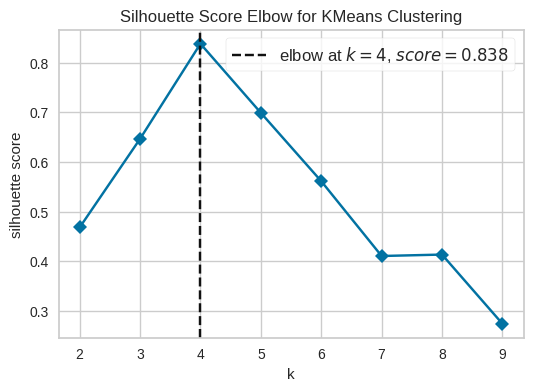

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize = (6, 4))
visualizer = KElbowVisualizer(kmeans,
                              k = (2, 10),
                              metric = 'silhouette',
                              timings = False)
visualizer.fit(df_m)
visualizer.show()

In [12]:
visualizer.k_scores_

[np.float64(0.4681880249587285),
 np.float64(0.6465494387391414),
 np.float64(0.838105818907135),
 np.float64(0.698957612302987),
 np.float64(0.5613355265959067),
 np.float64(0.41064530510602887),
 np.float64(0.4135391205441593),
 np.float64(0.2742796195617322)]

Обучить модель кластеризации.

In [13]:
kmeans = KMeans(n_clusters = 3,
                init = 'k-means++',
                algorithm = 'lloyd',
                n_init = 4,
                random_state = 42)
kmeans.fit(df_m)

KMeans(n_clusters=3, n_init=4, random_state=42)

In [14]:
kmeans.labels_

array([2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0,
       0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0], dtype=int32)

Построить таблицу с исходными значениями признаков и номерами кластеров для каждого объекта.

In [17]:
dfc = df.copy()
dfc['Кластер'] = kmeans.labels_
dfc.head(10)

,x1,x2,x3,Кластер
0,5.093243,3.747538,0.890167,2
1,5.238663,4.180865,2.235159,2
2,-6.014521,4.289452,7.492152,1
3,-9.513500,2.350497,7.159665,1
4,-8.578435,2.026593,6.010267,1
5,-8.626333,3.830692,6.776596,1
6,-6.472434,2.885676,7.227964,1
7,-9.100237,5.667274,8.380909,1
8,-3.500202,-9.347356,4.482757,0
9,-9.586920,3.316583,8.031477,1


Построить диаграмму рассеяния и отобразить цветами полученные кластеры.

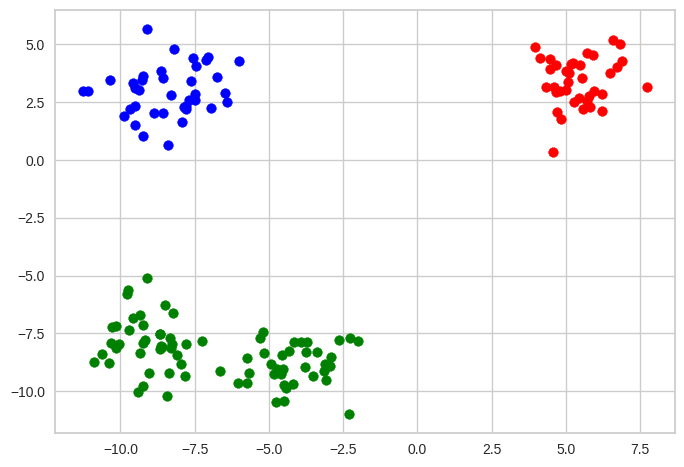

In [21]:
colors = ['green', 'blue', 'red']

for i in range(len(df)):
  plt.scatter(df['x1'].loc[i],
              df['x2'].loc[i],
              color = colors[kmeans.labels_[i]])

Описать полученные кластеры:
- построить таблицу, содержащую средние значения признаков в каждом кластере;
- построить диаграммы boxplot для всех признаков, разделенных по кластерам.


In [22]:
df_segm = dfc.groupby(['Кластер']).mean()
df_segm

,x1,x2,x3
Кластер,,,
0,-6.676599,-8.390311,-2.436895
1,-8.411040,2.977369,7.944117
2,5.427914,3.395846,0.500275


/tmp/ipython-input-280770284.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels = clusters)


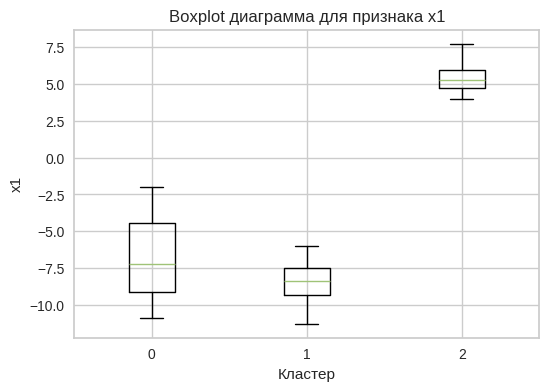

/tmp/ipython-input-280770284.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels = clusters)


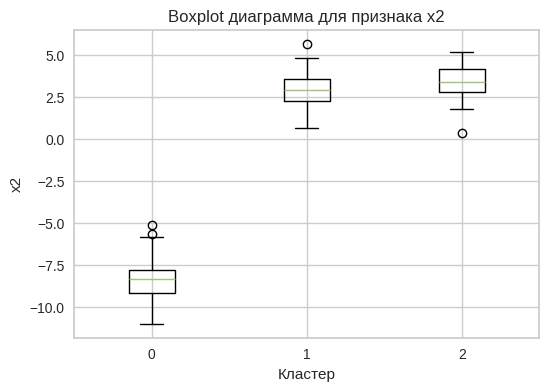

/tmp/ipython-input-280770284.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels = clusters)


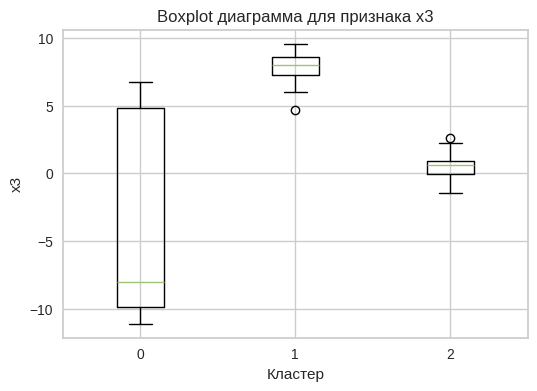

In [23]:
clusters = sorted(dfc['Кластер'].unique())
for col in dfc.columns[:-1]:
  plt.figure(figsize = (6, 4))
  data = []
  for c in clusters:
    data.append(dfc[dfc['Кластер'] == c][col])

  plt.boxplot(data, labels = clusters)
  plt.title(f'Boxplot диаграмма для признака {col}')
  plt.xlabel('Кластер')
  plt.ylabel(col)
  plt.show()

# **3. Кластеризация с использованием иерархического агломеративного алгоритма**

Для выполнения заданий использовать библиотеки `scipy` и `yellowbrick`.

Построить и вывести матрицу связностей (расстояний).


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link = linkage(df_m, 'ward', 'euclidean')
link[:5]

array([[9.80000000e+01, 1.12000000e+02, 1.03826027e-02, 2.00000000e+00],
       [8.30000000e+01, 1.14000000e+02, 1.11325891e-02, 2.00000000e+00],
       [2.00000000e+01, 1.23000000e+02, 1.11767307e-02, 2.00000000e+00],
       [1.50000000e+01, 1.27000000e+02, 1.61787561e-02, 2.00000000e+00],
       [9.00000000e+01, 1.08000000e+02, 1.71198567e-02, 2.00000000e+00]])

Построить дендрограмму (отключить раскраску кластеров различными цветами).

На ее основе определить количество кластеров и пороговое значение расстояния.


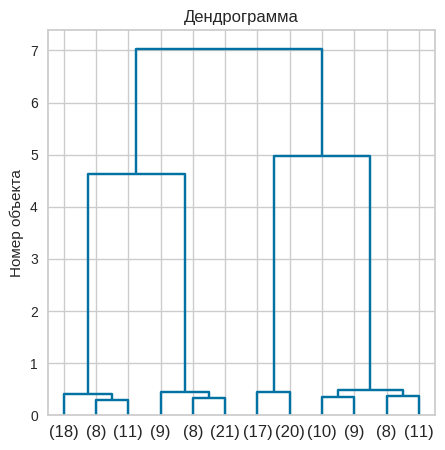

In [27]:
plt.figure(figsize = (5, 5))
plt.title('Дендрограмма')
plt.ylabel('Номер объекта')
dendrogram(link,
           truncate_mode = 'lastp',
           p = 12,
           color_threshold = -1)
plt.show()

Построить дендрограмму с выбранным пороговым значением расстояния.


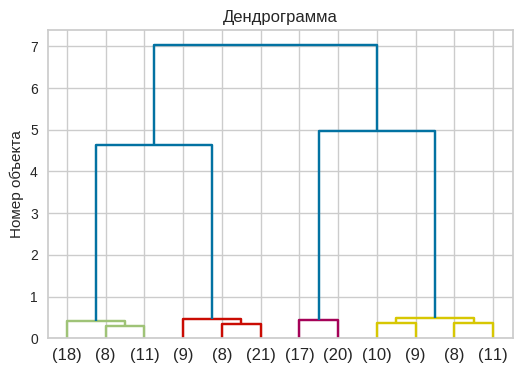

In [28]:
plt.figure(figsize = (6, 4))
plt.title('Дендрограмма')
plt.ylabel('Номер объекта')
dendrogram(link,
           truncate_mode = 'lastp',
           p = 12,
           color_threshold = 1)
plt.show()

Построить таблицу с исходными значениями признаков и номерами кластеров для каждого объекта.

In [29]:
dfc1 = df.copy()
dfc1['Кластер'] = fcluster(link, 1, criterion = 'distance')
dfc1.head()

,x1,x2,x3,Кластер
0,5.093243,3.747538,0.890167,3
1,5.238663,4.180865,2.235159,3
2,-6.014521,4.289452,7.492152,4
3,-9.513500,2.350497,7.159665,4
4,-8.578435,2.026593,6.010267,4


Построить диаграмму рассеяния и отобразить цветами полученные кластеры.

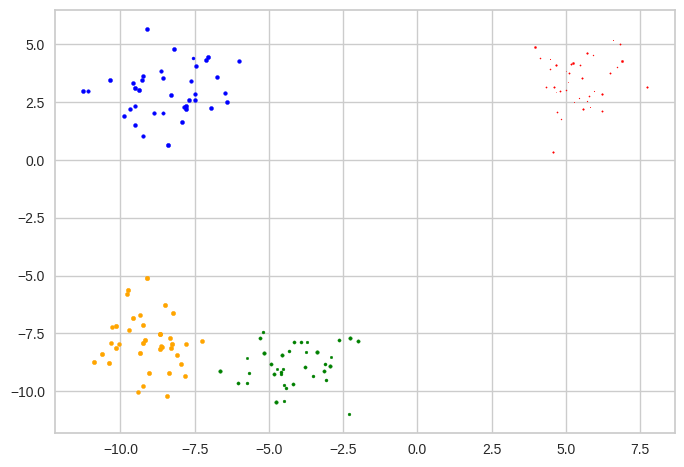

In [48]:
colors = ['green', 'orange', 'red', 'blue']

for i in range(len(dfc1)):
    plt.scatter(dfc1['x1'].iloc[i],
                dfc1['x2'].iloc[i],
                s = abs(dfc1['x3'].iloc[i]),
                color = colors[dfc1['Кластер'].iloc[i] - 1])

plt.show()

Описать полученные кластеры:
- построить таблицу, содержащую средние значения признаков в каждом кластере;
- построить диаграммы boxplot для всех признаков, раздеденных по кластерам.


In [32]:
df1_segm = dfc1.groupby(['Кластер']).mean()
df1_segm

,x1,x2,x3
Кластер,,,
1,-4.202170,-8.894385,4.977216
2,-9.085911,-7.899502,-9.655898
3,5.427914,3.395846,0.500275
4,-8.411040,2.977369,7.944117


/tmp/ipython-input-1732798603.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels = clusters)


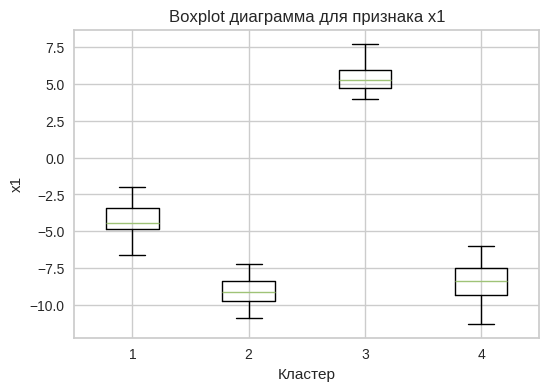

/tmp/ipython-input-1732798603.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels = clusters)


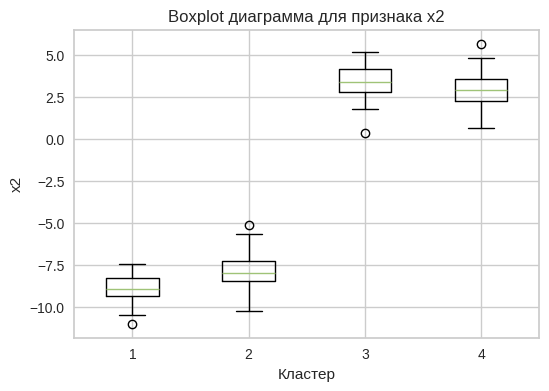

/tmp/ipython-input-1732798603.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels = clusters)


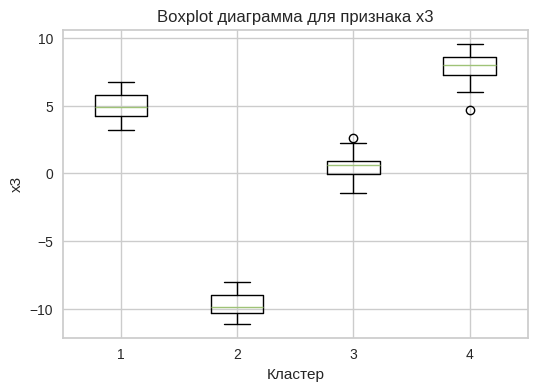

In [33]:
clusters = sorted(dfc1['Кластер'].unique())
for col in dfc1.columns[:-1]:
  plt.figure(figsize = (6, 4))
  data = []
  for c in clusters:
    data.append(dfc1[dfc1['Кластер'] == c][col])

  plt.boxplot(data, labels = clusters)
  plt.title(f'Boxplot диаграмма для признака {col}')
  plt.xlabel('Кластер')
  plt.ylabel(col)
  plt.show()